# A demo to annotate an HCC dataset(Lu2022) by LiverCT

Yuhan Fan, 2023/08/13

### download trained models from zenodo

In [1]:
import os
import gdown
import shutil

url = "https://zenodo.org/record/8239570/files/models.zip"
output = "/home/wyh/liver_atlas/model/LiverCT_models.zip"
gdown.download(url, output, quiet=False)
shutil.unpack_archive(output, extract_dir="/home/wyh/liver_atlas/model/LiverCT_models/")
os.remove(output)

/home/wyh/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
Downloading...
From: https://zenodo.org/record/8239570/files/models.zip
To: /home/wyh/liver_atlas/model/LiverCT_models.zip
100%|██████████| 70.2M/70.2M [01:38<00:00, 713kB/s] 


### load query data

In [1]:
import scanpy as sc
adata = sc.read_h5ad("/home/wyh/liver_atlas/data/Lu2022/Lu2022_43878.h5ad")
# "batch" here is the keyword used as _scvi_batch; if not provided, all cells are treated as one batch
adata

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


AnnData object with n_obs × n_vars = 71915 × 43878
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Cell_ID', 'Sample_ID', 'Original_name_global', 'Original_name_sub', 'State', 'Patient_ID', 'Sample_status', 'Sample_status_original', 'Seq_tech', 'GEO_accession', 'Source', 'Gender', 'Age', 'Disease', 'Fibrotic_status', 'Author', 'Virus_infection', 'TNM', 'batch'
    var: 'features'

### Annotate cell types and intermediate/deviated states

In [2]:
from liverct_annot import *
res, latent = cell_states_annot(model_dir="/home/wyh/liver_atlas/model/LiverCT_models/models/",
                                adata_test=adata, finetune_epoch=20)
res

/home/wyh/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
INFO:pytorch_lightning.utilities.seed:Global seed set to 0
 captum (see https://github.com/pytorch/captum).
/home/wyh/liver_atlas/code/LiverCT/liverct_annot.py:34: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  test.obs['batch'] = list(meta['batch'])
/home/wyh/anaconda3/envs/cell2loc_env/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


INFO     Using data from adata.layers["counts"]                                              


/home/wyh/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/scvi/model/base/_archesmixin.py:95: UserWarning: Query integration should be performed using models trained with version >= 0.8
  warnings.warn(
/home/wyh/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function transfer_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)
INFO:scvi.data._anndata:Using data from adata.layers["counts"]


INFO     Registered keys:['X', 'batch_indices', 'labels']                                    


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'labels']


INFO     Successfully registered anndata object containing 71915 cells, 2000 vars, 22        
         batches, 9 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  


INFO:scvi.data._anndata:Successfully registered anndata object containing 71915 cells, 2000 vars, 22 batches, 9 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Training for 20 epochs.                                                             


INFO:scvi.model._scanvi:Training for 20 epochs.
INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 1/20:   0%|          | 0/20 [00:00<?, ?it/s]

/home/wyh/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:97: UserWarning: Specified kernel cache directory could not be created! This disables kernel caching. Specified directory is /home/wyh/.cache/torch/kernels. This warning will appear only once per process. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646756402876/work/aten/src/ATen/native/cuda/jit_utils.cpp:860.)
  + torch.lgamma(x + theta)


Epoch 20/20: 100%|██████████| 20/20 [02:33<00:00,  7.68s/it, loss=1.14e+03, v_num=1]
2023-08-14 14:16:28.339524 Test set feature selection start
Normalization has been escaped.
2023-08-14 14:16:28.339618 Test set lv1 predict start...
2023-08-14 14:16:30.340453 Test set lv2 predict start...
2023-08-14 14:16:30.401275 B cell lv2 predict...
B cell predict is finished in 0.02274
2023-08-14 14:16:30.424102 Cholangiocyte lv2 predict...
Cholangiocyte predict is finished in 0.085477
2023-08-14 14:16:30.509676 Endothelial cell lv2 predict...


/home/wyh/liver_atlas/code/LiverCT/test_function.py:142: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_part.obs["voting_lv2_1"] = celltype_tree[g_label][0]  # adata_part.obs['pred_lv1']
/home/wyh/liver_atlas/code/LiverCT/test_function.py:142: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_part.obs["voting_lv2_1"] = celltype_tree[g_label][0]  # adata_part.obs['pred_lv1']
/home/wyh/liver_atlas/code/LiverCT/test_function.py:109: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_part.obs["voting_lv2_1"] = list(clf2.classes_[rank[:, -1]])
/home/wyh/liver_atlas/code/LiverCT/test_function.py:142: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_part.obs["voting_lv2_1"] = celltype_tree[g_label][0]  # adata_part.obs['pred_lv1']


Endothelial cell predict is finished in 0.191645
2023-08-14 14:16:30.701396 Hepatocyte lv2 predict...
Hepatocyte predict is finished in 0.06827
2023-08-14 14:16:30.769743 Mesenchymal cell lv2 predict...


/home/wyh/liver_atlas/code/LiverCT/test_function.py:109: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_part.obs["voting_lv2_1"] = list(clf2.classes_[rank[:, -1]])


Mesenchymal cell predict is finished in 0.146013
2023-08-14 14:16:30.915818 Myeloid cell lv2 predict...


/home/wyh/liver_atlas/code/LiverCT/test_function.py:109: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_part.obs["voting_lv2_1"] = list(clf2.classes_[rank[:, -1]])


Myeloid cell predict is finished in 0.889414
2023-08-14 14:16:31.805626 Plasma B cell lv2 predict...
Plasma B cell predict is finished in 0.033655
2023-08-14 14:16:31.839495 TNK cell lv2 predict...


/home/wyh/liver_atlas/code/LiverCT/test_function.py:142: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_part.obs["voting_lv2_1"] = celltype_tree[g_label][0]  # adata_part.obs['pred_lv1']
/home/wyh/liver_atlas/code/LiverCT/test_function.py:109: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_part.obs["voting_lv2_1"] = list(clf2.classes_[rank[:, -1]])


TNK cell predict is finished in 0.712015


/home/wyh/liver_atlas/code/LiverCT/test_function.py:215: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  test_adata.obs['pred_lineage'] = list(lineage)
/home/wyh/liver_atlas/code/LiverCT/test_function.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oc_score[oc_score > 1] = 1
/home/wyh/liver_atlas/code/LiverCT/test_function.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oc_score[oc_score < -1] = -1
/home/wyh/liver_atlas/code/LiverCT/test_function.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

,pred_lineage,pred_lv1,pred_lv2,intermediate_score,deviated_score,intermediate_state,deviated_state,proba_lv1,voting_lv2_1,voting_lv2_2
HCC01T_AAACCTGAGGGCATGT,Lymphoid,TNK cell,CD8,0.207671,0.692808,intermediate,deviated,0.958754,CD8,CD4
HCC01T_AAACCTGAGTCGCCGT,Myeloid,Myeloid cell,Mono,0.550968,0.473674,intermediate,deviated,0.832728,Mono,Macro
HCC01T_AAACCTGCATTACCTT,Lymphoid,TNK cell,CD8,0.588049,0.819665,intermediate,deviated,0.873583,CD8,NK
HCC01T_AAACCTGGTCACACGC,Lymphoid,TNK cell,CD4,0.048813,0.068883,non-intermediate,deviated,0.922190,CD4,CD8
HCC01T_AAACCTGTCCAGTATG,Lymphoid,TNK cell,CD4,0.025520,0.258551,non-intermediate,deviated,0.977308,CD4,NK
...,...,...,...,...,...,...,...,...,...,...
HCC06T_TTTGTCACAGTATGCT,Lymphoid,Plasma B cell,Plasma,0.000000,-1.000000,non-intermediate,non-deviated,0.966847,Plasma,Unclassified
HCC06T_TTTGTCAGTCCAAGTT,Lymphoid,Plasma B cell,Plasma,0.000000,-1.000000,non-intermediate,non-deviated,0.988722,Plasma,Unclassified
HCC06T_TTTGTCAGTTTGCATG,Myeloid,Myeloid cell,Mono,0.221688,0.607958,intermediate,deviated,0.989165,Mono,Macro
HCC06T_TTTGTCATCCTGTACC,Myeloid,Myeloid cell,Mono,0.743149,0.483036,intermediate,deviated,0.978381,Mono,Macro


### Annotate hepatocyte zonation groups

In [3]:
# select cells labeled as Hepatocyte
hep = adata[res['voting_lv2_1'] == "Hepatocyte"]
# "donor_ID" here is the keyword used as _scvi_batch; if not provided, all cells are treated as one batch
hep.obs['donor_ID'] = list(hep.obs['Patient_ID'])
hep_res, hep_latent = hep_zonation_annot(model_dir="/home/wyh/liver_atlas/model/LiverCT_models/models/",
                                         hepatocyte_adata=hep, finetune_epoch=20)
hep_res

/tmp/ipykernel_1256611/1197088194.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  hep.obs['donor_ID'] = list(hep.obs['Patient_ID'])
/home/wyh/anaconda3/envs/cell2loc_env/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
/home/wyh/liver_atlas/code/LiverCT/liverct_annot.py:91: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  test.obs['donor_ID'] = list(meta['donor_ID'])


INFO     Using data from adata.layers["counts"]                                              


/home/wyh/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/scvi/model/base/_archesmixin.py:95: UserWarning: Query integration should be performed using models trained with version >= 0.8
  warnings.warn(
/home/wyh/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function transfer_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)
INFO:scvi.data._anndata:Using data from adata.layers["counts"]


INFO     Registered keys:['X', 'batch_indices', 'labels']                                    


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'labels']


INFO     Successfully registered anndata object containing 11675 cells, 2000 vars, 209       
         batches, 2 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  


INFO:scvi.data._anndata:Successfully registered anndata object containing 11675 cells, 2000 vars, 209 batches, 2 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Training for 20 epochs.                                                             


INFO:scvi.model._scanvi:Training for 20 epochs.
INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 20/20: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it, loss=2.13e+03, v_num=1]


HCC01T_AAGACCTGTTTGTTGG       m
HCC01T_ACCAGTATCAGCTGGC       m
HCC01T_ACGGAGATCCGCGCAA    pp+p
HCC01T_AGCAGCCTCGCTAGCG    pp+p
HCC01T_AGCGTCGTCGACAGCC    pp+p
                           ... 
HCC06T_TTGGCAATCCCTAACC       c
HCC06T_TTGTAGGAGGAACTGC       m
HCC06T_TTTACTGTCAGCTCTC       c
HCC06T_TTTCCTCTCACCCTCA       c
HCC06T_TTTGGTTCAGCGATCC       m
Name: zonation_pred, Length: 11675, dtype: object

### Visualize query data

/tmp/ipykernel_1256611/2872699924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latent.obs['hep_zonation'][hep.obs_names] = list(hep_res)


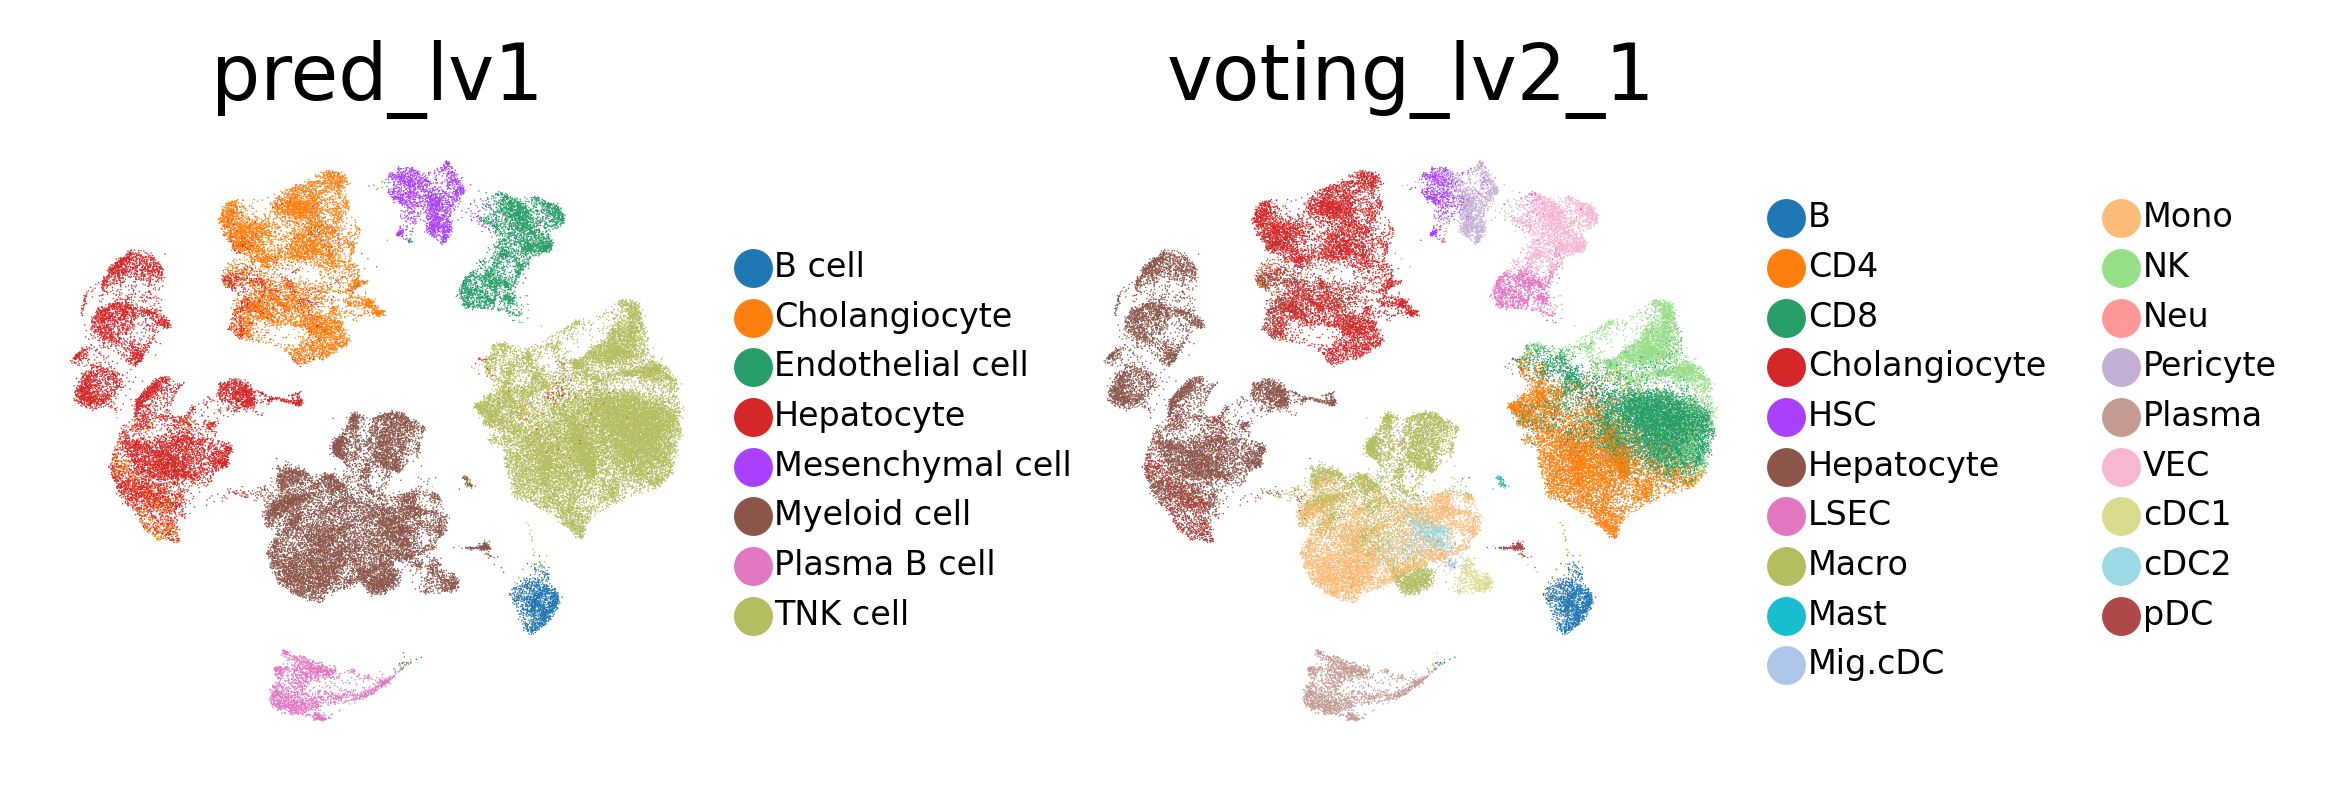

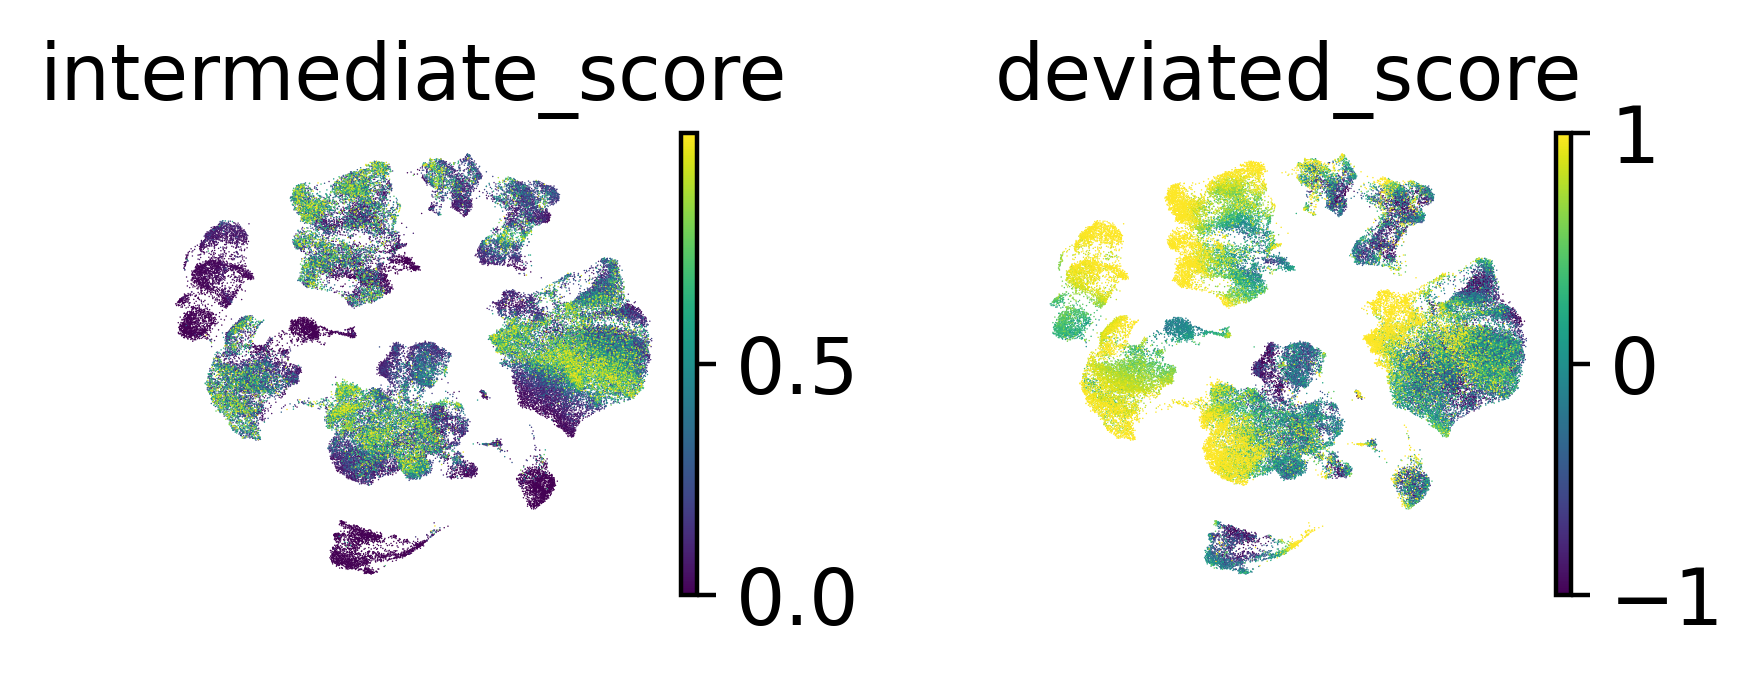

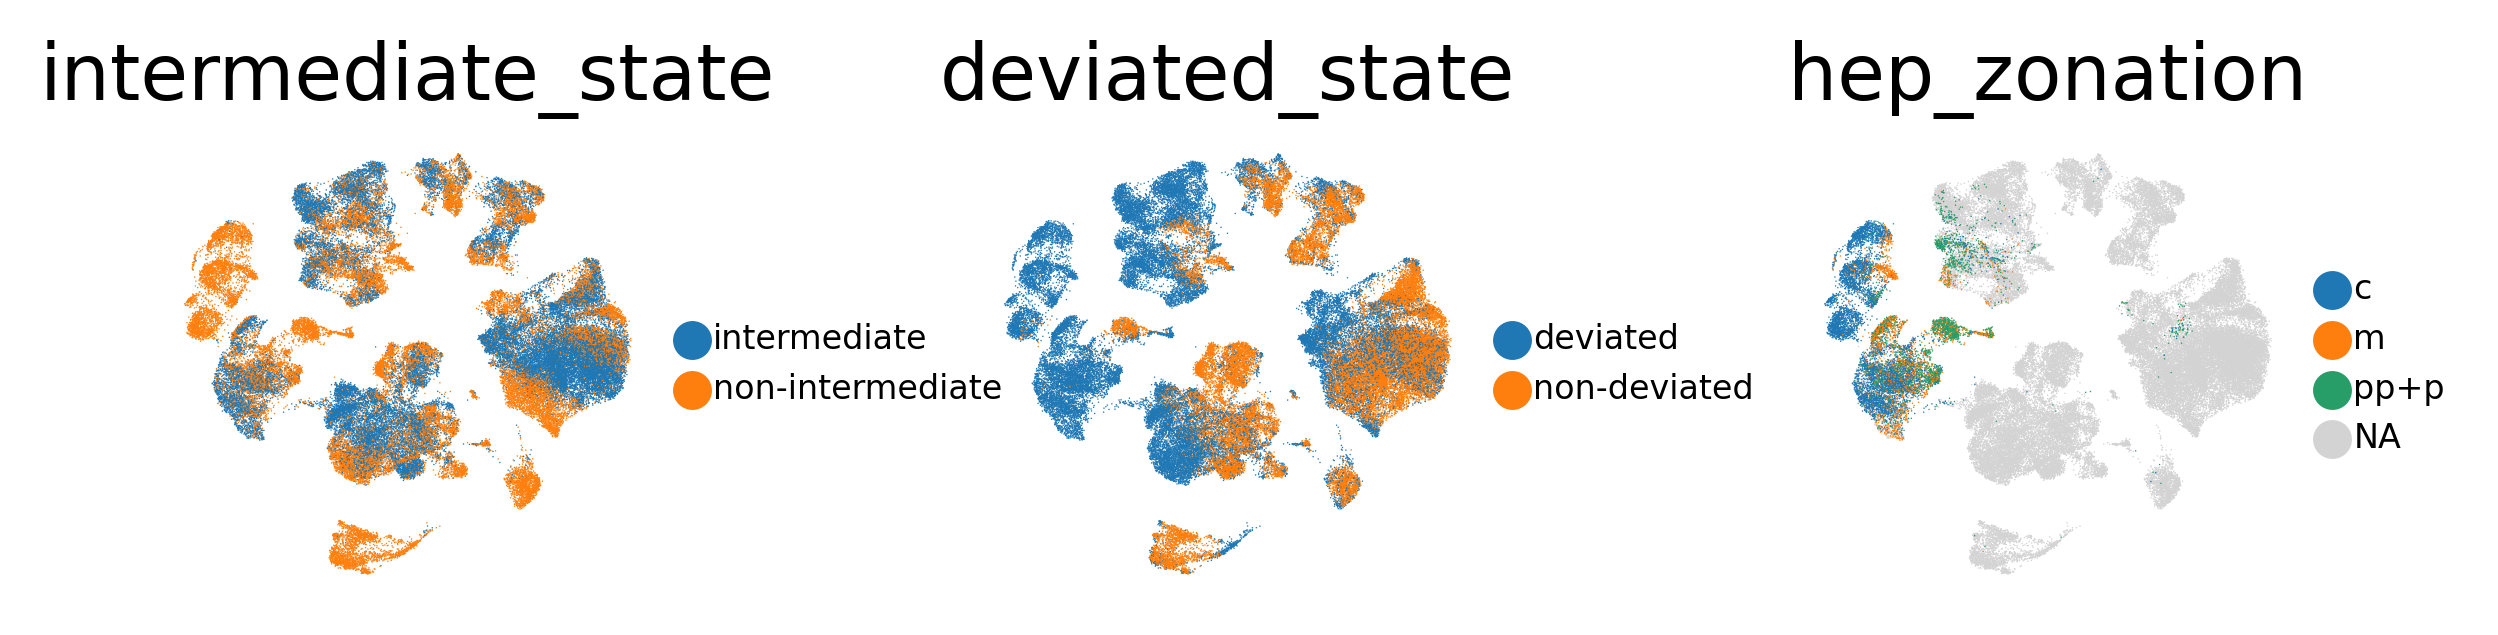

In [4]:
latent.obs = pd.concat([adata.obs, res], axis=1)
latent.obs['hep_zonation'] = None
latent.obs['hep_zonation'][hep.obs_names] = list(hep_res)

sc.pp.neighbors(latent, use_rep='X')
sc.tl.umap(latent)

sc.settings.set_figure_params(dpi=200, figsize=(2,2), frameon=False)
sc.pl.umap(latent, color=['pred_lv1', 'voting_lv2_1'], size=20000 / latent.n_obs, legend_fontsize=6)

sc.settings.set_figure_params(dpi=200, figsize=(1.5,1.5), frameon=False)
sc.pl.umap(latent, color=['intermediate_score', 'deviated_score'], size=20000 / latent.n_obs)
sc.pl.umap(latent, color=['intermediate_state', 'deviated_state', 'hep_zonation'], size=20000 / latent.n_obs, legend_fontsize=6)